(sec-robo-world)=
# Roboterwelt

Für diese Übung benötigen wir das Paket ``roboworld`` was Sie sich durch

```
pip install roboworld
```

herunterladen und installieren können.


```{admonition} Lernziel
:class: learngoals
Im [ersten Teil](sec-robo-world-part-1) dieser Übung machen wir Sie mit den Kontrollstrukturen von imperativen Programmiersprachen vertraut.
Dazu tauchen Sie in eine vorgegebene Welt ein und lernen das **Was** von dem **Wie** zu trennen (siehe [Das Was und das Wie](sec-what-and-how)).

Im [zweiten Teil](sec-robo-world-part-2) werden wir interessante aber auch schwierigere Fragen diskutieren und durch *Computational Thinking* lösen.
```

Roboter dienen uns heute in vielen Bereichen als Helfer und Assistenten.
Sie fertigen Autos und andere große Maschinen an, spielen gegeneinander Fußball und interagieren mit uns Menschen auf direktem Weg.
Roboter können dort eingesetzt werden, wo es für den Menschen zu gefährlich wird.
Zum Beispiel, hatte man versucht durch einen Roboter die Lage am Kernreaktor von Chernobyl besser zu analysieren.
Ein weiteres Beispiel ist die Entschärfung von Sprengstoff oder das Auffinden von Überlebenden welche unter Gebäuden begraben wurden.

Roboter agieren zu Land, Wasser als auch Luft -- ob als Drohnen, kleine Schiffswrackentdecker oder Landschaftserkunder.
Auch in unserem Alltag nehmen uns Roboter zunehmens die Arbeit ab.
Ein prominentes Beispiel ist der Roboterstaubsauger, welcher autonom die Wohnung reinigt.

Das große Feld der künstlichen Intelligenz als auch der Robotik sind interdisziplinäre Gebiete die eng miteinander verwoben sind, denn ein Roboter ist im Grunde eine mechanische Konstruktion versehen mit einer künstliche Intelligenz.
Um eine solche künstliche Intelligenz soll es in diesem Kapitel gehen.
Genauer gesagt beschäftigen wir uns mit der Frage wie ein Roboter durch eine ihm unbekannte Welt navigiert.

## Die Welt

Unser Roboter bewegt sich in einer vereinfachten Version unserer Welt.
Zunächst einmal gibt es anstatt drei, lediglich zwei Dimensionen.
Wir lassen die Höhe der Objekte weg.
Man könnte auch sagen, dass wir uns im sogenannten *Flachland* befinden.
Zusätzlich diskretisieren wir den Raum gleichmäßig in $x$- und $y$-Richtung, sodass unser Gebiet $\Omega$ ein zweidimensionales diskretes gleichmäßiges Gitter ist.
Das Gebiet ist außerdem beschränkt.
Mathematisch können wir das Gebiet wie folgt definieren:

$$
\Omega \subset \mathbb{N} \times \mathbb{N}, \text{ und } |\Omega| = k \text{ für irgendein } k \in \mathbb{N}.
$$

```{figure} ../../figs/roboworld/roboworld.png
---
width: 400px
name: fig-robo-world-roboworld
---
Das diskrete Gebiet aus Zellen mit 3 Zeilen und 7 Spalten.
```

Einen Gitterpunkt nennen wir **Zelle**.
Unser Roboter befindet sich in genau einer Zelle und kann von Zelle zu Zelle wandern, sofern die Zelle nicht durch ein anderes Objekt belegt ist.
Eine Zelle hat einen von folgenden endlichen Zuständen:

1. Leer (die Zelle ist leer)
2. Roboter (der Roboter befindet sich in der Zelle)
3. Hindernis (ein unverrückbares Objekt befindet sich in der Zelle)
4. Objekt (ein verrückbares Objekt befindet sich in der Zelle)
5. Ziel (die Zelle repräsentiert das örtliche Ziel des Roboters)

Um die Welt und ihren Roboter anzuzeigen benötigen Sie das Paket ``roboworld``.

In [1]:
import roboworld as rw

Es gibt verschiedene Methoden um verschiedene Welten zu erzeugen.
Mit

In [2]:
world = rw.new_world(nrows = 5, ncols = 9)

erzeugen Sie ein Gebiet mit 5 Zeilen und 9 Spalten.
Die Zelle in der linken unteren Ecke hat stets die Koordinate ``(0,0)`` und die obere rechte Zelle die Koordinate ``(ncols-1, nrows-1)``.
Der Roboter wird bei dieser Form der Erzeugung in die Mitte des Gebiets gesetzt und das Ziel wird zufällig in eine Zelle gelegt.

Um sich die erzeugte Welt anzeigen zu lassen rufen Sie

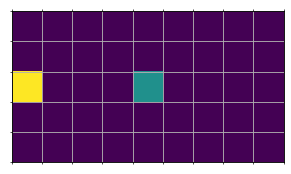

In [3]:
world.show()

auf.
Jede Zelle hat eine bestimmte Farbe die ihren aktuellen Zustand beschreibt.

Die Welt ist eine statische Welt, welche nur vom Roboter selbst verändert werden kann.
In anderen Worten, der Zustand der Zellen bleibt unverändert außer Ihr Roboter verändert ihren oder seinen eigenen Zustand.

## Der Roboter

Der Roboter kann sich durch ein Gebiet bewegen und Objekte aufnehmen, herumtragen und wieder absetzten.
Außerdem kann er Zellen markieren auf denen er sich befinden ``set_mark()`` oder Markierungen von besuchten Zellen entfernen ``unset_mark()``.
Um ihm Befehle zu erteilen müssen Sie ihn zunächst von der Welt durch

In [4]:
robo = world.get_robo()

heranholen.
Der Roboter hat eine Ausrichtung, d.h. seine Nase zeigt in eine von vier Himmelsrichtungen:

1. Norden
2. Osten
3. Süden
4. Westen

Der Roboter kann nur geradeaus laufen ``move()`` und sich nur nach links drehen ``turn_left()``.
Sie können durch ``is_facing_north()`` den Roboter fragen ob er nach Norden ausgerichtet ist.
Steht der Roboter an der Stelle ``(i,j)`` kann er durch mehrmaliges Drehen und einmal ``move()`` demnach nur die Zellen

1. ``(i+1,j)``,
2. ``(i-1,j)``,
3. ``(i,j+1)`` und
4. ``(i,j-1)`` 

erreichen. Diese Nachbarschaft heißt im übrigen *Von-Neumann-Nachbarschaft*, siehe {numref}`Abbildung {number} <fig-robo-world-von-neumann-nh>`.

```{figure} ../../figs/roboworld/von-neumann-nh.png
---
width: 400px
name: fig-robo-world-von-neumann-nh
---
Die von Neumann Nachbarschaftsbeziehung.
```

Der Roboter kann durch ``is_wall_in_front()`` festellen ob direkt vor ihm ein Hindernis (oder der Rand des Gebiets) ist und durch ``is_mark_in_front()`` abfragen ob die Zelle vor der der Roboter steht markiert ist.

Durch ``is_object_in_front()`` können Sie den Roboter fragen ob sich direkt vor ihm ein (verrückbares) Objekt befindet.
Mit ``take()`` können Sie diese Objekt aufnehmen und es mit ``put()`` direkt vor dem Roboter absetzten (falls dies möglich ist).
Dabei kann der Roboter jedoch nur ein Objekt gleichzeitig tragen.

Fassen wir die Methoden des Roboters zusammen:

+ ``move()`` bewegt den Roboter eine Zelle nach vorne,
+ ``turn_left()`` lässt den Roboter um 90 Grad nach links drehen,
+ ``is_facing_north()`` ist genau dann ``True`` wenn der Roboter nach norden (oben) ausgerichtet ist,
+ ``is_wall_in_front()`` ist genau dann ``True`` wenn vor dem Roboter ein (unverrückbares) Hindernis ist,
+ ``is_object_in_front()`` ist genau dann ``True`` wenn vor dem Roboter ein (verrückbares) Objekt ist,
+ ``set_mark()`` markiert die Zelle auf der der Roboter gerade steht,
+ ``is_mark_in_front()`` ist genau dann ``True`` wenn vor dem Roboter eine markierte Zelle ist,
+ ``unset_mark()`` entfernt die Markierung von der Zelle auf der der Roboter gerade steht,
+ ``take()`` nimmt ein Objekt auf, und
+ ``put()`` legt es ab.

Sie rufen eine Methode ``method()`` durch 

```python
robo.method()
```

auf.

(sec-robo-world-part-1)=
## Einfache Erkundungen

Jede Welt besteht aus einer Aufgabe die Ihr Roboter lösen muss.
Ob er erfolgreich war, können Sie mit

In [5]:
world.is_successful()

False

abfragen.
Diese Methode der Welt gibt genau dann ``True`` zurück wenn die Aufgabe erfolgreich abgeschlossen ist.

### Korridor

Unsere erste Welt die wir betrachten ist ein einfacher Korridor, welchen ihr Roboter von Westen nach Osten durchlaufen soll.

Führen Sie folgenden Code aus und lassen Sie sich damit die Welt ersteinmal anzeigen.
Ihr Roboter befindet sich in der Zelle ``(0,0)`` und ist nach Osten ausgerichtet.
Das Ziel befindet sich ganz im Osten.

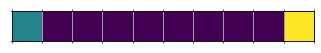

In [6]:
world = rw.corridor()
robo = world.get_robo()
world.show()

```{exercise} Mühsames Durchwandern des Korridors
:label: robo-corridor-success-no-loops-exercise
Laufen Sie mit Ihrem Roboter zum Ziel.
Verwenden Sie dabei **keine** Schleifen.
```

In [7]:
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()
robo.move()

world.is_successful()

move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)


True

```{exercise} Kollision
:label: robo-corridor-collision-exercise
Führen Sie den obigen Code (ohne die Erzeugung der Welt) mehrfach aus.
Was beobachten Sie?
Welche Ursache hat Ihre Beobachtung?
```

```{solution} robo-corridor-collision-exercise
:label: robo-corridor-collision-solution
:class: dropdown
Nachdem der Roboter am Ziel angekommen ist und wir erneut mit ihm nach vorne ziehen, läuft er gegen die Gebietsgrenze.
Das führt zu einem Fehler (einer ``WallInFrontException``).
```

Sie können sich die Wanderung ihres Roboters auch ansehen.
Rufen Sie dazu

In [8]:
rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


auf.

```{admonition} Animation
:class: warning
Das Animieren der Welt kann nur einmal am Ende Ihrer Wanderung ausgeführt werden, da der Speicher (die Wanderung) danach vergessen wird.
```

````{exercise} Festes Durchwandern des Korridors
:label: robo-corridor-success-fixed-loops-exercise
Lösen Sie das Problem erneut, verwenden Sie dabei das 
```python
for ... in range(...)
```
Konstrukt. 
Sie können eine frische neue Welt erzeugen.
````

move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
True


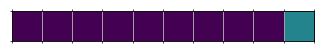

In [9]:
world = rw.corridor()
robo = world.get_robo()

for _ in range(9):
    robo.move()

print(world.is_successful())
world.show()

Sie können sich auch Korridore unterschiedlicher Länge konstruieren.
Dazu rufen Sie 

```python
world = rw.corridor(length)
```

mit einem Argument ``length`` auf, wobei ``length`` eine positive Zahl größer gleich 2 sein muss.
Zum Beispiel:

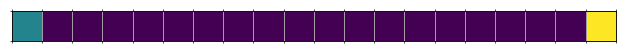

In [10]:
world = rw.corridor(20)
world.show()

```{exercise} Durchwandern des variablen Korridors
:label: robo-corridor-success-variable-loops-exercise
Durchwandern Sie nun einen Korridor dessen Länge Sie nicht kennen.
```

move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
move (14,0) -> (15,0)
move (15,0) -> (16,0)
move (16,0) -> (17,0)
move (17,0) -> (18,0)
move (18,0) -> (19,0)
move (19,0) -> (20,0)
move (20,0) -> (21,0)
move (21,0) -> (22,0)
move (22,0) -> (23,0)
move (23,0) -> (24,0)
True


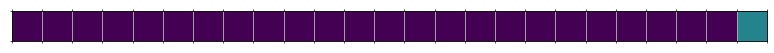

In [11]:
length = 25
world = rw.corridor(length)
robo = world.get_robo()

while not robo.is_wall_in_front():
    robo.move()

print(world.is_successful())
world.show()

Bis jetzt bewegen wir unseren Roboter nur in eine Richtung.
Was ist aber wenn wir nicht wissen wie der Roboter am Anfang ausgerichtet ist?
Durch den Aufruf

In [12]:
length = 25
world = rw.corridor(length, random_headway=True)

wird ihr Roboter zufällig ausgerichtet.

```{exercise} Durchwandern des variablen Korridors mit variabler Ausrichtung
:label: robo-corridor-success-2variable-loops-exercise
Durchwandern Sie nun einen Korridor dessen Länge Sie nicht kennen, wobei Sie auch nicht wissen wie Ihr Roboter zu Beginn ausgerichtet ist.
Testen Sie Ihren Code indem Sie ihn mehrfach ausführen.
```

turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
move (14,0) -> (15,0)
move (15,0) -> (16,0)
move (16,0) -> (17,0)
move (17,0) -> (18,0)
move (18,0) -> (19,0)
move (19,0) -> (20,0)
move (20,0) -> (21,0)
move (21,0) -> (22,0)
move (22,0) -> (23,0)
move (23,0) -> (24,0)
True


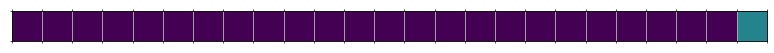

In [13]:
length = 25
world = rw.corridor(length, random_headway=True)
robo = world.get_robo()

# be sure that robo is facing north
while not robo.is_facing_north():
    robo.turn_left()
# we need three left turns to head east
robo.turn_left()
robo.turn_left()
robo.turn_left()
while not robo.is_wall_in_front():
    robo.move()

print(world.is_successful())
world.show()

Unser Roboter kann sich nur nach links drehen und wir können nur feststellen ob er gerade nach Norden ausgerichtet ist.
Aus diesen beiden primitiven Operationen können wir jedoch komplexere Operationen durch **Komposition** erzeugen.
Um den Roboter nach Osten auszurichten, drehen wir ihn solange nach links bis er nach norden ausgerichtet ist.
Dann wissen wir, dass dreimal nach links drehen gleich einmal nach rechts drehen entspricht und wir somit den erwünschten Effekt erzielen.

Um diese neue Operation *nach Osten Ausrichten* ``turn_east(robo)`` bequem in unserem Arsenal zu haben, extrahieren wir sie in eine eigene Funktion.

```{exercise} Nach Osten Ausrichten
:label: robo-turn_east-exercise
Implementieren Sie die Funktion ``turn_east(robo)``.
Sie müssen lediglich Ihren bereits geschriebenen Code in die Funktion packen.
Dabei ist das Argument ``robo`` ihr Roboter.
Verwenden Sie daraufhin Ihre soeben geschriebene Funktion um die Aufgabe {ref}`robo-corridor-success-2variable-loops-exercise` zu lösen.
```

turn Direction.SOUTH -> Direction.EAST
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
move (14,0) -> (15,0)
move (15,0) -> (16,0)
move (16,0) -> (17,0)
move (17,0) -> (18,0)
move (18,0) -> (19,0)
move (19,0) -> (20,0)
move (20,0) -> (21,0)
move (21,0) -> (22,0)
move (22,0) -> (23,0)
move (23,0) -> (24,0)
True


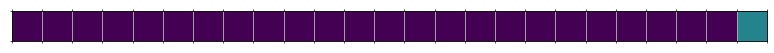

In [14]:
def turn_east(robo):
    # be sure that robo is facing north
    while not robo.is_facing_north():
        robo.turn_left()
        
    # we need three left turns to head west
    robo.turn_left()
    robo.turn_left()
    robo.turn_left()

length = 25
world = rw.corridor(length, random_headway=True)

robo = world.get_robo()
turn_east(robo)
while not robo.is_wall_in_front():
    robo.move()

print(world.is_successful())
world.show()

```{exercise} Zur Wand laufen
:label: robo-walk-to-wall-exercise
Extrahieren Sie nun den Code der den Roboter zur Wand laufen lässt in eine Funktion ``walk_to_wall(robo)``.
```

turn Direction.SOUTH -> Direction.EAST
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
move (14,0) -> (15,0)
move (15,0) -> (16,0)
move (16,0) -> (17,0)
move (17,0) -> (18,0)
move (18,0) -> (19,0)
move (19,0) -> (20,0)
move (20,0) -> (21,0)
move (21,0) -> (22,0)
move (22,0) -> (23,0)
move (23,0) -> (24,0)
True


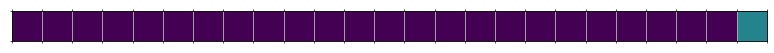

In [15]:
def walk_to_wall(robo):
    while not robo.is_wall_in_front():
        robo.move()

length = 25
world = rw.corridor(length, random_headway=True)
robo = world.get_robo()

turn_east(robo)
walk_to_wall(robo)

print(world.is_successful())
world.show()

### Einschub: Benennung

Loht es sich wirklich diese zwei Codezeilen in eine eigene Funktion zu packen?
Zwei Gründe offenbaren sich hier:

1. [Lesbarkeit](sec-roboworld-readability) und
2. [Wiederverwendbarkeit](sec-roboworld-reusability).

(sec-roboworld-readability)=
#### Lesbarkeit

Selbst wenn die Zeilen

In [16]:
while not robo.is_wall_in_front():
    robo.move()

einfach zu verstehen sind, so müssen wir dennoch Zeit investieren um die ``while``-Schleife und die zwei Methoden zu lesen und in Kombination zu verstehen.
Befinden sich diese Codezeilen in einer langen Codesequenz wird es nicht leichter.

Wir wollen mit diesen beiden Zeilen gerade bewirken, dass der Roboter zur nächsten Wand vor ihm läuft.
Unser Gehirn hat diese Aufgabe bereits gelöst, weshalb sollten wir also Denkressourcen vergeuden, wenn wir nach einer gewissen Zeit wieder zu diesem Code zurückkehren?
Da wir vergessen, müssen wir erneut feststellen was diese beiden Zeilen bewirken.
Wir könnten die Zeilen auch mit Kommentaren versehen:

In [17]:
# move to wall in front
while not robo.is_wall_in_front():
    robo.move()

Doch nichts dient der Dokumentation besser als wohlstrukturierter Code mit sprechenden und wohlüberlegten Variablen und Funktionsnamen.
Diese Benennung ist eine Kunst für sich.
Wir haben uns für den Namen ``walk_to_wall`` entschieden.

In der Informatik ist die Sprache der Wahl Englisch, daran müssen Sie sich gewöhnen.
Die Gemeinschaft ist international, zudem ist Englisch oft prägnanter und kürzer als Deutsch.

Andere Namen wären ebenso denkbar, z.B. würde ``walk_to_wall_in_front`` noch genauer beschreiben, **was** passiert.
Doch zu lange Namen erschweren das Lesen, was den Vorteil der Strukturierung zunichte macht.
Unserem Gehirn fällt es einfach sich an einen bestimmten Namen zu erinnern und sich über den Namen an den bereits betrachteten Code und dessen Auswirkung zu erinnern.
Deshalb ist ein kurzer Name der viel über die Methode aussagt aber nicht alles im Detail beschreibt ein guter Name.
Zum Beispiel wäre ``turn_left_move_one_cell_forward_turn_left()`` ein schlechter Name, obwohl er genau beschreibt was die Methode macht.
Besser wäre, z.B., ``move_left_corner()`` oder ``take_left_turn()``.

Es ist ein Abwägen zwischen, wie viel Wissen können wir bei der Leserschaft vorraussetzen und wie lange sollte der Name maximal werden.
Das Wissen bezieht sich zum einen auf die Codebasis, also wie viel von unserem Code hat der Leser bereits verstanden, aber zum anderen auch auf das Anwendungsgebiet.
Für Klimaforscher\*innen ist vermutlich klar was

```python
ocean.mean_temperature()
```

bedeuten könnte.
Gute Namen berücksichtigen die Zielgruppe.

Namen sollten auch konsistent gewählt werden.
Zum Beispiel haben wir uns entschieden alle Methoden des Roboters die entweder ``True`` oder ``False`` zurückgeben mit ``is`` zu beginnen.
Es wäre inkonsistent wenn es eine Methode ``is_wall_in_front()`` und ``object_in_front()`` gäbe.
Inkonsistenz verlangt beim Lesen mehr mentale Anstrengung, was zu vermeiden ist und damit eine Verschwendung geistiger Kräfte darstellt.
Unser Gehirn ist eine visuelle Mustererkennungsmaschine, deshalb ist nicht nur der Name an sich wichtig sondern auch die visuelle Darstellung des Codes.

Um dieses Argument noch zu untermauern hier ein Beispiel, welches Ihnen bekannt vorkommen sollte.
Sehen Sie sich folgendes Spielchen an:
Sie haben die Menge $M = \{a,b,c,d,e,f,g,h,i\}$ und acht Teilmengen $\{a,b,c\}$, $\{d,e,f\}$, $\{g,h,i\}$, $\{a,d,g\}$, $\{b,e,h\}$, $\{c,f,i\}$, $\{a,e,i\}$ und $\{c,e,g\}$.
Sie spielen zu zweit und jeder wählt nacheinander ein Element aus $M$.
Jedes dieser Elemente kann nur einmal gewählt werden.
Ziel ist es als erster Elemente zu wählen, sodass man alle Elemente einer der acht Teilmengen besitzt.
In dieser Art und Weise formuliert, fällt es unserem Gehirn sehr schwer das Spiel zu spielen.
Dabei ist das Spiel nichts anderes als *Tic-Tac-Toe*.
In visueller Form, ist das Spiel sehr einfach zu spielen:

```{figure} ../../figs/roboworld/tic-tac-toe.png
---
width: 200px
name: fig-tic-tac-toe
---
```

Gewisse Konsistenzen können wir nicht selbst wählen, da wir an einer Gemeinschaft teilnehmen.
Zum Beispiel trennen wir in ``Python`` die Wörter, die einen Variablen- oder Funktions-/Methodennamen ausmachen durch den Unterstrick ``_`` und zwar nicht weil es zwangsläufig die beste Art und Weise ist, sondern weil sich die ``Python``-Gemeinschaft darauf geeinigt hat.
In ``Java`` verwendet man hingegen die sogenannte Camel-Caps-Schreibweise: ``isWallInFront()``.
Solche Normen erleichtern die Zusammenarbeit ungemein.
Es lohnt sich frühzeitig diese Normen nachzuschlagen oder den Code von anderen Programmierer\*innen, auch wegen der Benennung von Variablen und Funktionen/Methoden, zu betrachten.

(sec-roboworld-reusability)=
#### Wiederverwendbarkeit

Gute Programmierer\*innen sind faul.
Faul in dem Sinne, dass wir Maschinen für uns arbeiten lassen.
Und faul in dem Sinne, dass wir keine Aufgabe zweimal lösen, egal wie klein die Aufgabe auch war!

Finden Sie in Ihrem Code an mehreren Stellen das gleiche **Muster** wird es Zeit dieses **Muster** zu abstrahieren und wiederzuverwenden.
Das obige Beispiel verdeutlicht wie 'klein/kurz' dieses Muster sein kann.

Selbst wenn Sie den Code noch nicht an mehreren Stellen verwenden, dieser aber eine bestimmte Aufgabe löst, sollten Sie darüber nachdenken diesen in eine eigene Funktion zu kapseln.
Denken Sie an Ihr zukünftiges ich oder an andere Programmierer\*innen, die auf ihrem Code aufbauen.
Je kleiner die Aufgabe ist, die gekapselt werden kann, desto kleiner sind Ihre Schritte hin zur Lösung einer größeren Aufgabe und desto leichter wird es Ihnen fallen.
Sie befreien sich von der kleinen Aufgabe, können diese abhaken und voranschreiten.

Das ist vergleichbar mit einer Einkaufsliste.
Sie schreiben diese Liste nicht weil Sie zu doof oder zu faul sind um sich zu merken was Sie einkaufen möchten.
Nein, Sie schreiben diese Liste damit Sie sich der nächsten Aufgabe des Tages widmen können.
Sie schreiben diese Liste damit Sie während des Einkaufens auf andere Dinge, wie zum Beispiel Ihre Umgebung, besser eingehen können.
In anderen Worten, damit Sie mental für andere Aufgaben gewadmet sind, denn das Problem was Sie einkaufen möchten ist ja bereits gelöst.

````{exercise} Ein irrer Läufer
:label: robo-corridor-multi-exercise
Eraten Sie was folgender Code bewirken soll. 
Wo befindet sich der Roboter, wenn er ganz im Westen und nach Osten ausgerichtet startet?

```python
for _ in range(5):
    walk_to_wall(robo)
    turn(robo) # turn zu deutsch 'umdrehen'
```

Implementieren Sie ``turn(robo)`` und führen Sie den Code aus.
Lassen Sie sich die Animation anzeigen.
````

```{solution} robo-corridor-multi-exercise
:label: robo-corridor-multi-solution
:class: dropdown
Der Roboter läuft zur Wand vor ihm dreht sich um 180 Grad.
Das wiederholt er fünfmal, somit läuft er hin und her.
Am Ende befindet er sich ganz im Osten am Ziel.
```

In [18]:
length = 25
world = rw.corridor(length)
robo = world.get_robo()

def turn(robo):
    robo.turn_left()
    robo.turn_left()

for _ in range(5):
    walk_to_wall(robo)
    turn(robo)

rw.animate(world)

move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
move (14,0) -> (15,0)
move (15,0) -> (16,0)
move (16,0) -> (17,0)
move (17,0) -> (18,0)
move (18,0) -> (19,0)
move (19,0) -> (20,0)
move (20,0) -> (21,0)
move (21,0) -> (22,0)
move (22,0) -> (23,0)
move (23,0) -> (24,0)
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
move (24,0) -> (23,0)
move (23,0) -> (22,0)
move (22,0) -> (21,0)
move (21,0) -> (20,0)
move (20,0) -> (19,0)
move (19,0) -> (18,0)
move (18,0) -> (17,0)
move (17,0) -> (16,0)
move (16,0) -> (15,0)
move (15,0) -> (14,0)
move (14,0) -> (13,0)
move (13,0) -> (12,0)
move (12,0) -> (11,0)
move (11,0) -> (10,0)
move (10,0) -> (9,0)
move (9,0) -> (8,0)
move (8,0) -> (7,0)
move (7,0) -> (6,0)
move (6,0) -> (5,0)
move

MovieWriter imagemagick unavailable; using Pillow instead.


Erinnern Sie sich an die obige Aufgabe {ref}`robo-turn_east-exercise`.
Dort haben wir eine Funktion ``turn_east(robo)`` implementiert.
Weshalb erweitern wir unseren Werkzeugkasten nicht um ``turn_north(robo)``, ``turn_west(robo)`` und ``turn_south(robo)``.


```{exercise} Drehungen
:label: robo-turn-all-exercise
Implementieren Sie ``turn_north(robo)``, ``turn_west(robo)`` und ``turn_south(robo)``.
Vermeiden Sie doppelten Code!
Verwenden Sie ``turn(robo)``.
Sie müssen unter Umständen ``turn_east(robo)`` anpassen.
```

``turn_east(robo)`` verwendet bereits ``turn_north(robo)``, deshalb ergibt sich folgender Code:

In [19]:
def turn_north(robo):
    while not robo.is_facing_north():
        robo.turn_left()

def turn_west(robo):
    turn_north(robo)
    robo.turn_left()

def turn_south(robo):
    turn_north(robo)
    turn(robo)

def turn_east(robo):
    turn_west(robo)
    turn(robo)

### Korridor mit Objekten

Die nächste Welt die unser Roboter durchlaufen soll ist ein Korridor der Objekte auf dem Weg zum Ziel enthalten kann.

Der Roboter kann über diese nicht einfach drüber steigen.
Er muss ein Objekt was vor ihm liegt aufnehmen ``take()`` und kann dann erst wieder weiterlaufen.
Zudem kann der Roboter nur ein Objekt gleichzeitig tragen.
Falls er ein Objekt trägt, kann er es mit ``put()`` vor ihm ablegen.
Sie können mit ``is_object_in_front()`` prüfen ob vor dem Roboter ein Objekt liegt.

Mit

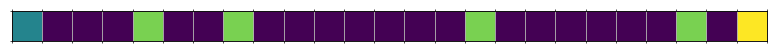

In [20]:
length = 25
nobjects = 4
world = rw.corridor(length=length, nobjects=nobjects)
robo = world.get_robo()
world.show()

erstellen Sie eine Welt mit einem Korridor der Länge 25 welcher 4 Objekte enthält.
Diese Objekte werden zufällig in freien Zellen des Korridors verteilt.

````{exercise} Der Lauf nach Osten mit verrückbaren Hindernissen
:label: robo-walk-east-with-objects-exercise
Lassen Sie Ihren Roboter erneut einmal von Westen nach Osten durch die Welt

```python
world = rw.corridor(length=25, random_headway=True, nobjects=4)
```

laufen.
Implementieren Sie geeignete Funktionen um Ihren Code lesbar zu halten.

````

Um ein Objekt aus dem Weg zu räumen definieren wir die Funktion ``move_object(robo)``.
Diese lässt den Roboter das Objekt, welches sich vor ihm befindet, aufnehmen und hinter sich ablegen.

In [21]:
def move_object(robo):
    robo.take()
    turn(robo)
    robo.put()
    turn(robo)

Eine weitere Funktion ``walk(robo)`` lässt den Roboter solange nichts im Weg ist (``nothing_in_front(robo)``) laufen.

In [22]:
def nothing_in_front(robo):
    return not robo.is_wall_in_front() and not robo.is_object_in_front()

def walk(robo):
    while nothing_in_front(robo):
        robo.move()

Schließlich können wir unseren Roboter loslaufen lassen:

In [23]:
turn_east(robo)
walk(robo)
while not robo.is_wall_in_front():
    move_object(robo)
    walk(robo)

print(world.is_successful())

turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (0,0) -> (1,0)
move (1,0) -> (2,0)
move (2,0) -> (3,0)
takes CellState.OBJECT
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
puts CellState.OBJECT
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (3,0) -> (4,0)
move (4,0) -> (5,0)
move (5,0) -> (6,0)
takes CellState.OBJECT
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
puts CellState.OBJECT
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
move (6,0) -> (7,0)
move (7,0) -> (8,0)
move (8,0) -> (9,0)
move (9,0) -> (10,0)
move (10,0) -> (11,0)
move (11,0) -> (12,0)
move (12,0) -> (13,0)
move (13,0) -> (14,0)
takes CellState.OBJECT
turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
puts CellState.OBJECT
turn Direction.WEST -> Directi

```{exercise} Eine unmögliche Aufgabe
:label: robo-walk-east-with-objects-impossible-exercise

1. Funktioniert unser bzw. Ihr Code auch wenn keine Objekte vorhanden sind?
2. Funktioniert unser bzw. Ihr Code für jeden möglichne Korridor mit Objekten?
3. Gibt es einen Korridor mit Objekten den wir unmöglich durchwandern können?

```

```{solution} robo-walk-east-with-objects-impossible-exercise
:label: robo-walk-east-with-objects-impossible-solution
:class: dropdown
1. Ja, unser Code funktioniert auch wenn keine Objekte vorhanden sind.
2. Nein, falls zu Beginn ein Objekt direkt vor uns ist, können wir es nicht beiseite schaffen. Wir müssten es aufnehmen und mindestens einen Schritt noch vorne laufen und es dann ablegen zu können!
3. Ja, falls zu Beginn direkt zwei oder mehr Objekte vor uns liegen. Wir haben dann keine Möglichkeit diese beiseite zu schaffen!
```

Anstatt ein Objekt aufzunehmen und es direkt wieder abzulegen, können wir es auch aufnehmen und erst dann ablegen wenn es notwendig ist.

In [24]:
def put_behind(robo):
    turn(robo)
    robo.put()
    turn(robo)

turn_east(robo)
walk(robo)
while not robo.is_wall_in_front():
    robo.take()
    walk(robo)
    put_behind(robo)

print(world.is_successful())

turn Direction.EAST -> Direction.NORTH
turn Direction.NORTH -> Direction.WEST
turn Direction.WEST -> Direction.SOUTH
turn Direction.SOUTH -> Direction.EAST
True


Dieser Code funktioniert auch wenn direkt am Anfang ein Objekt auf uns wartet.

(sec-robo-world-part-2)=
## Komplexere Erkundungen

### Zufallslauf
Die nächste Aufgabe besteht darin durch ein quadratisches Gebiet ohne Hindernisse mithilfe des Zufalls zu navigieren.

Betrachten wir ein quadratisches Gebiet mit ``nrow`` Zeilen und ``ncols`` Spalten (``nrow == ncols``) ohne Objekte oder Hindernisse, wobei sich der Roboter im Zentrum und sein Ziel an einen zufälligen Ort befinden:

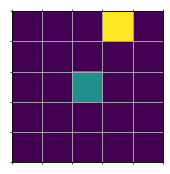

In [25]:
nrows = 5
ncols = 5
world = rw.new_world(nrows=nrows, ncols=ncols)
robo = world.get_robo()
world.show()

Eine, nicht besonders schlaue Strategie um zum Ziel zu laufen ist es zufällig eine der vier Nachbarn der *Von-Neumann-Nachbarschaft* als nächste Zelle auszuwählen.
Diese Art der Fortbewegung nennt man *Zufallslauf* (engl. *Random Walk*).

```{exercise} Der Zufallslauf
:label: robo-random-walk-exercise

Implementieren Sie eine Funktion ``random_walk(robo)``, welche den Roboter ``robo`` solange den *Zufallslauf* ausführen lässt, bis er sein Ziel ``is_at_goal()`` erreicht hat.

**Tipp:** Eventuell nutzt Ihnen die Funktion [choice()](https://docs.python.org/3/library/random.html#functions-for-sequences) des Pakets ``random``.
```

In [26]:
import random

def random_turn(robo):
    turns = random.choice([0,1,2,3])
    for _ in range(turns):
        robo.turn_left()

def random_walk(robo):
    required_steps = 0
    while not robo.is_at_goal():
        random_turn(robo)
        if not robo.is_wall_in_front():
            robo.move()
            required_steps = required_steps + 1
    return required_steps

robo.disable_print()
random_walk(robo)
print(world.is_successful())
rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


True


Ziemlich cool oder?
Wir haben zwar einen sehr ineffektiven Algorithmus aber irgendwann findet er das Ziel des Roboters.

Möchten wir den Algorithmus analysieren ergeben sich interessante Fragen.
Zum Beispiel, wie viele Schritte der Roboter im *Durchschnitt* machen muss oder anders gefragt:
Was ist der *Erwartungswert* für die Anzahl der Schritte, d.h. Aufrufe von ``move()``?

Der umgangsprachliche *Durchschnitt* von zwei oder mehreren Zahlen nennen wir in der Mathematik *Mittelwert* oder *arithmetisches Mittel*.
Der *Erwartungswert* (manchmal leider auch als Mittelwert bezeichnet) ist eine Zahl, die eine *Zufallsvariable* im Mittel annimmt.
Diese zwei Dinge sind grundverschieden!
Im Fall des *Mittelwerts* sprechen wir vom durchschnittlichen Wert konkreter Zahlen und im Fall des *Erwartungswerts* von einer Zahl die eine Zufallsvariable im Mittel annimmt.
Zum Beispiel können wir den Würfelwurf eines fairen Würfels betrachten.
Die Zufallsvariable wäre in diesem Fall die Augenzahl des Würfelwurfs.
Nehmen wir an wir Würfeln fünfmal und erhalten 1, 4, 1, 1, 2.
In diesem Fall wäre der *Mittelwert* gleich 

$$
(1+4+1+1+2) / 5 = 1.8
$$

Der Erwartungswert ist jedoch die Summe jeder möglichen Augenzahl multipliziert mit dessen Eintrittswahrscheinlichkeit:

$$
(1+2+3+4+5+6) \cdot 1/6 = 21/6 = 3.5
$$

Es gibt jedoch einen wichtigen Zusammenhang zwischen *Mittelwert* und *Erwartungswert*.
Je häufiger wir Würfeln, desto genauer nähert sich der *Mittelwert* dem *Erwartungswert* an.
Diesen wichtigen Zusammenhang gibt uns das sogenannte [Gesetz der großen Zahlen](https://de.wikipedia.org/wiki/Gesetz_der_gro%C3%9Fen_Zahlen), welches Sie in der Wahrscheinlichkeitstheorie noch kennenlernen werden.

+ Lassen wir unseren Roboter einmal laufen und zählen die benötigten Schritte, wissen wir wie viele Schritte er für genau diesen einen Lauf gebraucht hat.
+ Lassen wir unseren Roboter $n$ mal laufen und berechnen den *Mittelwert* der benötigten Schritte, wissen wir wie viele Schritte er für diese $n$ Läufe durchschnittlich gebraucht hat.
+ Lassen wir dieses $n$ immer größer und größer werden nähern wir uns dem *Erwartungswert* und können einschätzten wie viele Schritte der Roboter im Mittel generell braucht.

Im obigen Beispiel mit dem Würfelwurf, haben wir den *Erwartungswert* analytisch berechnet.
Prinzipiell bieten sich also zwei Möglichkeiten den *Erwartungswert* zu bestimmen:

1. Analytisch, d.h., wir nutzen die Mathematik, genauer gesagt die Wahrscheinlichkeitstheorie, um das Ergebnis analytisch herzuleiten
2. Experimentell, d.h., wir nutzten den Computer und probieren das ganze einfach aus

Analytisch ist die Frage nach der *erwarteten* Anzahl der benötigten Schritte des Roboters schwer zu lösen.

```{exercise} Wahrscheinlichkeiten
:label: robo-random-walk-wls-exercise

Bestimmen Sie für ein $5 \times 5$ Gebiet die Wahrscheinlichkeit dafür, dass der Roboter nach einem Schritt am Ziel angekommen ist.
Der Roboter startet in der Mitte des Gebiets.

```

```{solution} robo-random-walk-wls-exercise
:label: robo-random-walk-wls-solution
:class: dropdown

Diese noch recht einfach anmutende Frage ist schon nicht ganz leicht analytisch zu lösen.
Die Wahrscheinlichkeit, dass der Roboter in eine der vier Himmelsrichtungen läuft ist identisch und liegt bei 

$$
1/4.
$$

Wir benötigen noch die Wahrscheinlichkeit, dass das Ziel in einer der vier Zellen liegt.
Da das Ziel gleichwahrscheinlich in eine der Zelle (die Zelle des Roboter ausgenommen) fällt, ergibt sich hierfür

$$
4 / (5 \cdot 5 - 1) = 4 / 24 = 1 / 6
$$

Damit liegt die Wahrscheinlichkeit, dass der Roboter nur einen Schritt benötigt bei

$$
1 / 6 \cdot 1 / 4 = 1 / 24
$$

Sie können auch argumentieren, dass der Roboter zuerst zieht und wir das Ziel dann setzten.
Das Ziel muss genau auf die eine Zelle gesetzt werden, in der der Roboter ist.
Das heißt es muss 1 aus 24 möglichen Zellen sein.

```

Um die Frage nach den erwarteten Schritten zum Ziel experimentell zu lösen, müssen wir viele Experimente bzw. Simulationen machen und zählen wie viele Schritte der Roboter gebraucht hat.
Seien $s_1, \ldots, s_n$ die Schritte für die Experimente $1$ bis $n$ dann ist der *Mittelwert* gegeben durch

$$\frac{1}{n} \sum_{i=1}^n s_i = \frac{1}{n} (s_1 + \ldots + s_n)$$


```{exercise} Experimente
:label: robo-random-walk-mean-exercise

Implementieren Sie eine Funktion ``experiment(nrows, ncols)`` die 

1. eine neue Welt mit ``nrows`` Zeilen und ``ncols`` Spalten erzeugt,
2. den Roboter zum Ziel führt und
3. die Anzahl der benötigten ``move()``-Aufrufe zurückgibt (passen Sie ``random_walk(robo)`` entsprechend an).

Rufen Sie bevor Sie den ``random_walk(robo)`` ausführen ``world.disable_animation()`` und ``robo.disable_print()`` auf.
Die erste Methode deaktiviert die Animation der Welt und die zweite die Ausgabe der Roboteraktionen.
Dies spart Rechnerressourcen während der Berechnung.

Implementieren Sie sodann eine Funktion ``experiments(nrows, ncols, n)`` welche ``n``-mal ``experiment(nrows, ncols)`` aufruft und den *Durchschnitt* berechnet.
```

In [27]:
def experiment(nrows, ncols):
    world = rw.new_world(nrows=nrows, ncols=ncols)
    world.disable_animation()
    robo = world.get_robo()
    robo.disable_print()
    return random_walk(robo)

def experiments(nrows, ncols, n):
    mean = 0
    for _ in range(n):
        mean += experiment(nrows, ncols)
    return mean / n

mean = experiments(nrows=7, ncols=7, n=50)
print(mean)

95.52


Um ein Gefühl für den *Erwartungswert* zu erlangen können wir nun den *Durchschnitt* für unterschiedliche ``n`` bestimmen.

````{exercise} Entwicklung des Durchschnitts
:label: robo-random-walk-mean-n-exercise

Berechnen Sie für jeden Eintrag in ``x``

```python
x = list(range(1,401,1))
```

den *Durchschnitt* für ``ncols=5``, ``nrows=5``, sodass ``y`` alle Durchschnitte enthält.
Lassen Sie sich die Daten durch

```python
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo', markersize=2.5, alpha=0.5)
```

plotten.
Was beobachten Sie?

````

Erst generieren wir mit

In [28]:
nmax = 400
x = list(range(1,nmax+1,1))
y = [experiments(5, 5, n) for n in x]

die Daten und dann plotten wir sie

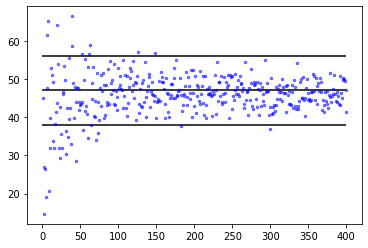

In [29]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'bo', markersize=2.5, alpha=0.5)
plt.hlines([38, 38 + (56-38)/2, 56], xmin=0, xmax=nmax, colors='black')

Mit

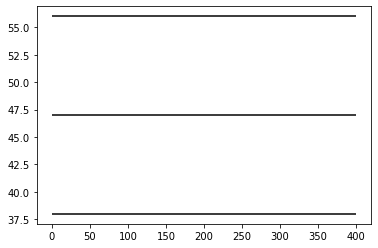

In [30]:
plt.hlines([38, 38 + (56-38)/2, 56], xmin=0, xmax=nmax, colors='black')

haben wir zwei horizontale Linien bei $y = 38$, $y = 38+(56-38)/2$ und $y = 56$ eingezeichnet um zu verdeutlichen, dass der *Erwartungswert* mit hoher Wahrscheinlichkeit in dem Interval $[38;56]$ liegt und der Mittelpunkt $38+(56-38)/2 = 47$ ein erster Schätzwert ist.
Wir beoachten außerdem, dass die Berechnung einige Zeit in Anspruch nimmt und sich der *Durchschnitt* für größer werdende ``n`` einem bestimmten Wert (dem *Erwartungswert*) zu nähern scheint.

````{exercise} Plotten mit matplotlib
:label: robo-plotten-exercise

Sehen Sie sich die [Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) der Funktion ``plt.plot()`` an und finden Sie heraus was die einzelnen Argumente des obigen Aufrufs

```python
plt.plot(x, y, 'bo', markersize=2.5, alpha=0.5)
```

bewirken bzw. bedeuten.

````

```{solution} robo-plotten-exercise
:label: robo-plotten-solution
:class: dropdown

+ ``x`` und ``y`` bestimmen die Datenpunkte, d.h. der ``i``-te Punkt ist definiert durch ``(x[i], y[i])``.
+ ``'bo'`` besagt, dass der Plot in in blauer Farbe ``'b'`` gezeichnet wird und dass kreisförmige Marker verwendet werden sollen ``'o'``.
+ Die größe der Marker wird durch ``marksize=2.5`` festgelegt.
+ ``alpha = 0.5`` besagt, dass der Plot zu 50 % transparent gezeichnet werden soll.

```

```{exercise} Plotten mit matplotlib
:label: robo-plotten-lines-exercise

Erzeugen Sie einen identischen Plot wobei dieser keine Marker dafür aber eine Funktionslinie enthalten soll.

```

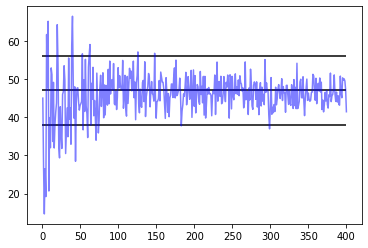

In [31]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'b-', markersize=2.5, alpha=0.5)
plt.hlines([38, 38 + (56-38)/2, 56], xmin=0, xmax=nmax, colors='black')

Solche Berechnungen in Form von Experimenten/Simulationen werden oft durchgeführt, wenn keine analytische Lösung bekannt ist oder sie gar nicht erst existiert.
Beim Suchen einer analytischen Lösung kann dies auch ein sehr hilfreiches Mittel sein.

Den *Erwartungswert* der notwendigen Schritte des Zufallslauf zu bestimmen ist eine schwierige Aufgabe, der Sie wahrscheinlich noch nicht gewachsen sind.
Dennoch können wir als *Computational Thinker\*innen* den Computer verwenden um durch (oft massiv viele) Berechnungen einen guten Schätzwert zu bestimmen.
Die oben durchgeführte Methode gehört zu den sog. [Monte-Carlo-Simulationen](https://de.wikipedia.org/wiki/Monte-Carlo-Simulation).

Natürlich brauchen wir für derartige Berechnungen viel Rechenleistung und damit auch viel Energie - sie sind nicht kostenlos!

```{exercise} Berechnungskosten
:label: robo-computational-costs-exercise

Wie häufig haben wir die Roboter der Experimente ungefähr bewegt.
Anders gefragt: Wie oft haben wir ``move()`` insgesamt aufgerufen?

1. Schätzen Sie erst selbst ab und
2. berechnen Sie es sodann aus ``y`` und ``x``.

```

Unser Schätzwert für den Durchschnitt liegt bei $47$, d.h. wir können davon ausgehen, dass jedes Experiment $47$ Schritte benötigt.
Wie viele Experimente haben wir durchgeführt?
Nun es waren

$$
\sum_{i=1}^{400} i = 1 + 2 + 3 + \ldots + 400 = (400 + 1) + (399 + 2) + \ldots + (201 + 200) = 401 \cdot 200 = 80 200 
$$

Insgesamt können wir die Anzahl der Schritte der Roboter mit 

$$
80 200 \cdot 47 = 3 769 400
$$

also ca. 3.7 Millionen abschätzen!

``x`` enthält die Anzahl der Experimente und ``y`` die durchschnittliche Anzahl an Roboterschritten.
Damit berechnet folgender Code die gesamte Anzahl an Schritten:

In [32]:
overall_steps = 0
for i in range(len(x)):
    overall_steps += x[i] * y[i]
print(overall_steps)

3716027.0


Ein etwas besser lesbarer Code entsteht wenn wir die ``Python`` Funktion ``zip`` verwenden:

In [33]:
overall_steps = 0
for n, mean in zip(x,y):
    overall_steps += n * mean
print(overall_steps)

3716027.0


Das Ergebnis von 3 666 350 Schritten ist etwas geringer als unsere Abschätzung. 
Wir haben uns um ``abs(3_666_350 - 3_769_400) / 3_666_350``, also circa 3 % verschätzt.

Haben Sie die Aufgabe {ref}`robo-random-walk-wls-exercise` analytisch lösen können?
Lassen Sie uns experimentell nachprüfen ob unsere Berechnungen stimmen!

```{exercise} Ein Schritt und ich bin da
:label: robo-one-move-wls-exercise

Berechnen Sie experimentell eine gute Schätzung für die Wahrscheinlichkeit, dass der Roboter in einem Schritt in einem Gebiet mit 5 Zeilen und 5 Spalten am Ziel angekommen ist.

```

In [34]:
def random_move(robo):
    random_turn(robo)
    robo.move()

def experiment(nrows, ncols):
    world = rw.new_world(nrows=nrows, ncols=ncols)
    world.disable_animation()
    robo = world.get_robo()
    robo.disable_print()
    random_move(robo)
    return robo.is_at_goal()

n = 100_000

count = 0
for _ in range(n):
    if experiment(5, 5):
        count += 1
print(f'Schätzwert: {count/n}, tatsächlicher Wert:{1/24}')

Schätzwert: 0.0413, tatsächlicher Wert:0.041666666666666664


Wir zählen die Anzahl der Läufe für die der Roboter mit nur einem zufälligen Schritt (``random_move(robo)``) am Ziel ist.
Da die Wahrscheinlichkeit für dieses Ereignis sehr klein ist, benötigen wir viele Experimente.
Um diese in akzeptabler Zeit durchführen zu können, brechen wir nach dem ersten Schritt des Roboters ab!
Das Ergebnis deutet stark darauf hin, dass wir uns nicht verrechnet haben.

Dieses Beispiel zeigt, wie Computer Sie bei Ihrer Denkarbeit unterstützten können.
Durch eine Vielzahl an Berechnungen liefert Ihnen der Computer Hinweise zur Lösung eines Problems.

### Deterministischer Lauf
Als nächstes sollen Sie das gleiche Gebiet deterministisch (ohne Zufall) durchlaufen.

```{admonition} Determinismus in der Informatik
:class: warning
Die Begriffe **deterministisch** und **nicht-deterministisch** haben in der theoretischen Informatik eine ganz bestimmte Bedeutung, welche nichts mit dem Zufall zu tun haben.
Es geht dabei um Zustandsübergänge:

+ Deterministisch bedeutet etwas (z.B. der Computer) geht von einem Zustand in einen bestimmten anderen Zustand über.
+ Nicht-deterministisch bedeutet etwas (z.B. der Computer) geht von einem Zustand in alle möglichen nächsten Zustände in einem Schritt (gleichzeitig) über.
```

Die Zufallsfahrt ist ineffektiv, wenn es unser Ziel ist mit so wenig Schritten wie möglich zum Ziel zu kommen.
Wir haben keine Gewissheit wie lange es für einen bestimmten Lauf dauern mag.
Lassen Sie uns nun eine Lauf zum Ziel entwickeln, für den wir eine feste Obergrenze an Schritten feststellen können.

```{exercise} Deterministischer Lauf
:label: robo-det-walk-exercise

1. Gehen Sie weg vom Rechner und überlegen Sie sich einen Algorithmus der den Roboter sicher ans Ziel des rechteckigen Gebiets ohne Hindernisse führt.
2. Implementieren Sie eine Funktion ``deterininstic_walk(robo)`` die den Roboter ohne eine Zufallskomponente für **alle möglichen rechteckigen Welten ohne Objekte und Hindernisse** ins Ziel führt.
3. Bestimmen Sie wie viele Schritte höchstens (worst-case) sowie mindestens (best-case) nötig sind.

```

Es gibt viele verschiedene Lösungen für diese Aufgabe.
Wir haben uns folgende Strategie überlegt:

```
Bewege den Roboter ganz nach Nordwesten.
Laufe jede Spalte ab:
    laufe nach Süden
    laufe einen Schritt nach Osten
    laufe nach Norden 
    laufe einen Schritt nach Osten
    ...
```

Wir verlagern das Laufen ganz nach Westen/Norden/Süden in Funktionen wie auch der Lauf nach Nordweste ``walk_north_west()``.

In [35]:
def walk_to_wall(robo, condition = lambda robo: True):
    while not robo.is_wall_in_front() and condition(robo):
        robo.move()

def walk_west(robo, condition = lambda robo: True):
    turn_west(robo)
    walk_to_wall(robo, condition)
    
def walk_north(robo, condition = lambda robo: True):
    turn_north(robo)
    walk_to_wall(robo, condition)

def walk_south(robo, condition = lambda robo: True):
    turn_south(robo)
    walk_to_wall(robo, condition)
    
def walk_north_west(robo, condition = lambda robo: True):
    walk_west(robo, condition)
    walk_north(robo, condition)

def deterministic_walk(robo):
    condition = lambda robo: not robo.is_at_goal()
    
    walk_north_west(robo, condition)
        
    down = True
    while not robo.is_at_goal():
        if down:
            walk_south(robo, condition)
        else:
            walk_north(robo, condition)
        turn_east(robo)
        if not robo.is_at_goal() and not robo.is_wall_in_front():
            robo.move()
        down = not down

Zudem passen wir ``walk_to_wall(robo, condition)`` so an, dass der Lauf abgebrochen wird sobald die ``condition`` nicht länger erfüllt ist.
In unserem Fall ist diese ``condition`` genau dann nicht mehr erfüllt, sobald der Roboter das Ziel erreicht hat.
``condition`` ist ein Funktion, welche als Argument den Roboter entgegen nimmt und einen Wahrheitswert zurückgibt.
Definieren wir keine ``condition`` ist der Wahrheitswert immer ``True``.

Lassen Sie uns diesen Code testen.

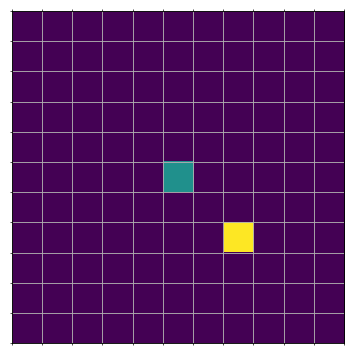

In [36]:
nrows = 11
ncols = 11
world = rw.new_world(nrows=nrows, ncols=ncols)
robo = world.get_robo()
world.show()

Für ein Gebiet mit $m$ Zeilen und $n$ Spalten benötigt unser Algorithmus mindestens einen und höchstens 

$$
n \cdot m + \left \lceil{m/2}\right \rceil + \left \lceil{n/2}\right \rceil
$$

Schritte, wobei $\left \lceil{\cdot}\right \rceil$ Aufrunden auf die nächste ganze Zahl bedeutet.


Das animierte Ergebnis sieht wie folgt aus

```{figure} ../../figs/roboworld/robo-world-det-walk.gif
---
width: 400px
name: fig-robo-world-det-walk
---
Ein deterministischer Lauf zum Ziel.
```

Erneut ergeben sich interessante Fragen:

1. Gibt es einen Algorithmus der den Roboter (für ein beliebiges Gebiet) so bewegt, dass wir jede Zelle nur maximal einmal durchlaufen?
2. Wenn nein, gibt es einen Algorithmus der dies für bestimmte Gebiete erzielt?

```{exercise} Perfekter Lauf
:label: robo-perfect-walk-exercise

Geben Sie ein Gebiet an und beschreiben Sie dazu einen geeigneten Algorithmus der jede Zelle nur einmal besucht.
Die Zelle auf der Ihr Roboter startet gilt als bereits besucht.

```

````{solution} robo-perfect-walk-exercise
:label: robo-perfect-walk-solution
:class: dropdown

Nehmen wir das $3 \times 3$-Zellen Gebiet:

```{figure} ../../figs/roboworld/roboworld-3-times-3.png
---
width: 80px
name: fig-roboworld-3-times-3
---
```

In diesem Fall können wir nach Westen laufen und dann einmal rund herum und haben jede Zelle nur einmal besucht.
Tatsächlich funktioniert diese Strategie für alle $n \times n$ Gebiete!
````

```{exercise} Unmöglicher Lauf
:label: robo-impossible-walk-exercise

Geben Sie ein Gebiet an für das es nicht möglich ist jede Zelle nur einmal zu durchlaufen.

```

````{solution} robo-impossible-walk-exercise
:label: robo-impossible-walk-solution
:class: dropdown

Ein einfaches Gegenbeispiel ist jedes $1 \times n$ für $n \geq 2$ Gebiet.

```{figure} ../../figs/roboworld/1-times-n.png
---
width: 240px
name: fig-1-times-n
---
```

````

Können Sie unseren Algorithmus aus der Lösung ({ref}`robo-perfect-walk-exercise`) implementieren?

```{exercise} Perfekter Lauf im Quadrat
:label: robo-perfect-walk-square-exercise

Implementieren Sie eine Funktion ``deterministic_walk_quare(robo)`` die den Roboter ohne eine Zufallskomponente für **alle möglichen quadratischen Welten ohne Objekte und Hindernisse** ins Ziel führt und jede Zelle maximal einmal besucht.
Die Funktion sollte die Anzahl der benötigten Schritte zurückgeben.

**Hinweis:** Wir empfehlen erneut vom Rechner weg zu gehen und sich erst einmal mit Stift und Papier zu überlegen welche Roboterbewegungen nötig sind und in welches **Muster** diese fallen.

```

Bisher haben wir uns nichts während des Laufens gemerkt.
Der Zustand des Roboters wurde lediglich durch seine Ausrichtung beschrieben.
Dies ändert sich nun!

Gilt für unser $n \times n$-Gebiet, dass $n$ eine gerade Zahl ist so befindet sich der Roboter nicht genau in der Mitte des Gebiets.
Er gefindet sich eine Zelle weiter im Norden als im Süden und eine Zelle weiter im Osten als im Osten!
Deshalb laufen wir mit dem ersten Schritt immer erst nach Westen und dann nach Süden, sodass wir gegen den Uhrzeigersinn laufen!

Zwischen der Drehung nach links (``turn_left()``) und den Schritten (``move()``) können wir folgenden Zusammenhang festellen:
Die Anzahl der Schritte erhöt sich nach jeder zweiten Drehung um eins.

```{figure} ../../figs/roboworld/spiral-walk.png
---
width: 400px
name: fig-robo-world-spiral-walk
---
Spirallauf: die Anzahl der ``move()`` Aufrufe erhöt sich um eins nach jedem zweiten ``turn_left()``.
```

Wir müssen nun noch darauf achten, dass wir nicht übers Ziel hinauslaufen.
Das ist auch schon alles.

In [37]:
def deterministic_walk_quare(robo):
    steps = 0
    moves = 1
    turn_west(robo)
    while not robo.is_at_goal():
        for _ in range(2):
            for _ in range(int(moves)):
                if not robo.is_at_goal():
                    robo.move()
                    steps += 1
                else:
                    break
            robo.turn_left()
        moves += 1
    return steps

Lassen Sie es uns testen:

In [38]:
nrows = 10
ncols = 10
world = rw.new_world(nrows=nrows, ncols=ncols)
robo = world.get_robo()
robo.disable_print()
world.show()
steps = deterministic_walk_quare(robo)
assert nrows * ncols > steps
print(world.is_successful())

rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


True


### Eine künstliche Intelligenz (optional)

Bis hierher haben wir Algorithmen entwickelt um unseren Roboter sicher durch eine teilweise bekannte Welt zu bewegen.
Wir wussten zwar nicht exakt wie diese Welt aussieht jedoch wussten wir, dass sie zum Beipiel keine Hindernisse oder Objekte enthält.
In anderen Worten, wir wussten unser Gebiet ist rechteckig.
Zudem wussten wir wo der Roboter startet (in der Mitte bzw. ganz im Westen).

Ändern wir die Perspektive und versetzten uns in den Roboter hinein.
Nehmen wir an wir wissen rein gar nichts über das Gebiet.
Wir kennen nur unseren, d.h. den Zustand des Roboters selbst.
Bewegen wir uns, können wir uns natürlich merken, wohin wir uns bewegt haben und wie die Welt dort aussah.
Wir können die Welt erkunden und so Unsicherheiten auflösen, in anderen Worten, wir können Informationen durch Erkundingen einholen.

Lassen wir verrückbare Objekte außer acht. 
Die Welt in der der Roboter sein Ziel finden muss ist eine Welt voller **unverrückbarer Hindernisse**.
Wir wissen weder wo der Roboter startet noch wie die Welt genau aussieht.
Der Roboter soll selbst den Weg durch Erkundung finden!

#### Aufzählen aller möglichen Läufe

Da wir absolut keine Wissen über das Gebiet haben, werden wir alle nur möglichen Läufe/Wege ausprobieren.
Erinnern Sie sich an den **Zufallslauf**!
Auch hier haben wir im Grunde alle möglichen Läufe durchprobiert allerdings mehrfach die selben und in chaotischer Reihenfolge.
Was wir zunächst benötigen ist ein Algorithmus, der uns alle möglichen Läufe auflisten kann.

Zunächst ist festzustellen, dass jeder Lauf eine Folge von Schritten ``move()`` und Linksdrehungen ``turn_left()`` ist.
Zum Beispiel besuchen wir mit 

``move()``, ``turn_left()``, ``turn_left()``, ``move()``, ``move()``.

drei Zellen (die Startzelle ausgeschlossen) und die Platzierung der Drehungen ``turn_left()`` in der Folge entscheidet bei welcher Zelle wir ankommen.
So können wir leicht alle möglichen Läufe mit drei ``move()`` Befehlen auflisten:

1. ``move()``, ``move()``, ``move()``
2. ``move()``, ``move()``, ``turn_left()``, ``move()``
3. ``move()``, ``move()``, ``turn_left()``, ``turn_left()``, ``move()``
4. ``move()``, ``move()``, ``turn_left()``, ``turn_left()``, ``turn_left()``, ``move()``
5. ``move()``, ``turn_left()``, ``move()``, ``move()``
6. ``move()``, ``turn_left()``, ``move()``, ``turn_left()``, ``move()``
7. ``move()``, ``turn_left()``, ``move()``, ``turn_left()``, ``turn_left()``, ``move()``
8. ``move()``, ``turn_left()``, ``move()``, ``turn_left()``, ``turn_left()``, ``turn_left()``, ``move()``
9. ``move()``, ``turn_left()``, ``turn_left()``, ``move()``, ``move()``
10. ...

#### Codierung der Läufe

Wir können hierfür eine andere, kürzere und besser handhabbare Repräsentation wählen, indem wir lediglich die Anzahl der ``turn_left()`` vor jedem ``move()`` notieren.
Wir lassen überflüssige Informationen weg:

1. 000
2. 001
3. 002
4. 003
5. 010
6. 011
7. 012
8. 013
9. 020
10. ...

Erinnert Sie das an etwas?

```{exercise} Anzahl möglicher Läufe
:label: robo-number-of-walks-exercise

Wie viele Unterschiedliche Läufe der Länge drei (drei mal ``move()``) gibt es?
```

```{solution} robo-number-of-walks-exercise
:label: robo-number-of-walks-solution
:class: dropdown

Es gibt

$$
4^3 = 64
$$

mögliche Läufe!

```

Einige Läufe besuchen teilweise die gleichen Zellen.
Zum Beispiel

+ ``move()``, ``move()``, ``move()`` bzw. 000 und 
+ ``move()``, ``move()``, ``turn_left()``, ``turn_left()``, ``move()`` bzw. 002.

Auch gibt es Läufe die auf der gleichen Zelle enden.
Darum kümmern wir uns später noch.

Von hier an verwenden wir für die Schreibweise eines Laufs die Codierung durch Zahlen.

Oben haben wir alle Laufe der Länge drei in einer bestimmten Art und Weise aufgelistet!
Wir starten mit 000 was als Dezimalzahl die 0 ist und addieren für jeden nächsten Lauf eins drauf:

1. 000 
2. 000 + 001 = 001
3. 001 + 001 = 002
4. 002 + 001 = 003
5. 003 + 001 = 010
6. ...

#### Tiefen- und Breitensuche

Hmm Moment einmal, wir wissen ja nicht wie oft wir den Roboter nach vorne bewegen können?
Es befinden sich Hindernisse im Gebiet, welche bestimmte Möglichkeiten ausschließen.
Das macht nichts, denn in diesem Fall lassen wir diesen Lauf einfach aus.

Auch kennen wir die Länge der Läufe nicht.
Auch das ist kein Problem, wir laufen solange bis es einfach nicht mehr weiter geht oder wir unser Ziel gefunden haben.
Zum Beispiel wird unser erster möglicher Lauf $n$ Nullen enthalten wobei $n$ die Anzahl der Schritte ist, welche wir den Roboter laufen lassen können bis er an ein Hindernis stößt.

Die oben gewählte Reihenfolge in der wir die Läufe auflisten nennt man *Tiefensuche* (engl. *depth-first search*).
Wir können aus den Läufen einen Baum konstruieren wobei jeder Lauf eine Durchwanderung des Baums von der Wurzel zu einem Kind darstellt.
Jeder Knoten hat genau 4 Kanten:

+ eine Kante für 0
+ eine für 1
+ eine für 2
+ eine für 3

Jeder Lauf ist durch ein Blatt (Knoten ohne Kinder) definiert.
Der Baum ist in {numref}`Abbildung {number} <fig-robo-world-tree>` skizziert.

```{figure} ../../figs/roboworld/robo-world-tree.png
---
width: 700px
name: fig-robo-world-tree
---
Ein Baum der alle möglichen Läufe der Länge zwei codiert.
```

*Tiefensuche* durchwandert einen Baum, sodass wann immer ein Kindknoten noch nicht besucht wurde, dieses besucht wird.
In anderen Worten wir gehen erst tief in den Baum hinein und springen erst wieder nach oben, wenn alles darunter bereits besucht wurde.
Zudem wandern wir meist von links nach rechts.

```{figure} ../../figs/roboworld/robo-world-depth-first-search.png
---
width: 700px
name: fig-robo-world-depth-first-search
---
**Tiefensuche** des Baums in {numref}`Abbildung {number} <fig-robo-world-tree>`. Die orangen Zahlen geben die Reihenfolge vor.
```

Ein anderer Algorithmus, der einen Baum durchwandert, ist die sogenannte *Breitensuche* (engl. *breadth-first search*).
Hierbei gehen wir erst in die nächst tiefere Ebene, wenn alle Knoten der aktuellen Ebene bereits besucht wurden.
Vergleichen Sie folgende Abbildung.

```{figure} ../../figs/roboworld/robo-world-breadth-first-search.png
---
width: 700px
name: fig-robo-world-breadth-first-search
---
**Breitensuche** des Baums in {numref}`Abbildung {number} <fig-robo-world-tree>`. Die orangen Zahlen geben die Reihenfolge vor.
```

#### Inverse Operationen

Um nun eine der beiden *Suchalgorithmen* als einen Roboterlauf zu implementieren haben wir noch ein Problem!
Wir können nicht so einfach von z.B. 03 nach 10 gehen.
Wann immer wir von einem Knoten wieder nach oben im Baum laufen, müssen wir auch mit dem Roboter den gelaufenen Weg zurücklaufen!
Deshalb benötigen wir für jede Kombination aus Drehungen und einen Schritt nach vorne laufen, die inverse Operation:
Laufe zurück und richte den Rober so aus, wie er zuvor ausgerichtet war.

```{exercise} Inverse Operation
:label: robo-inverse-operation-exercise
Was ist die inverse Operation von 1?
Anders gefragt, durch welche Folge von ``move()`` und ``turn_left()`` gelangt man im Baum von z.B. 0031 zu 003?
```

```{solution} robo-inverse-operation-exercise
:label: robo-inverse-operation-solution
:class: dropdown

1 bedeutet ``turn_left()``, ``move()``. 

Durch ``turn_left()``, ``turn_left()`` (bzw. ``turn(robo)``) und ``move()``, was im übrigen der 2 entspricht, laufen wir zurück.
Um nach einer Linksdrehung wieder zum Ausgangspunkt zu kommen, benötigen Sie drei Linksdrehungen.
Da wir den Roboter beim Zurücklaufen bereits zweimal gedreht haben fehlt noch ein ``turn_left()``.

```

```{exercise} Codierung in Operationen übersetzten
:label: robo-code-to-operation-exercise
1. Schreiben Sie eine Funktion ``move_back(robo)``, die den Roboter zurück bewegt (und die vorherige Ausrichtung wieder herstellt). 
2. Schreiben Sie eine Funktion ``move(robo, code)``, welche den Roboter so bewegt wie es der ``code`` 0, 1, 2 oder 3 vorgibt.
3. Schreiben Sie eine Funktion ``inverse_move(robo, code)``, welche den Roboter so bewegt, dass die Bewegung, welche durch ``code`` vorgegeben ist, rückgängig gemacht wird.

**Annahme:** Ignorieren Sie zunächst, dass eine ``move()`` Operation möglicherweise wegen einem Hindernis nicht durchführbar ist.
```

In [39]:
def move_back(robo):
    turn(robo)
    robo.move()
    turn(robo)
    
def move(robo, code):
    for _ in range(code):
        robo.turn_left()
    robo.move()
    
def inverse_move(robo, code):
    move_back(robo)
    for _ in range(4-code):
        robo.turn_left()

Sofern wir die inversen Operationen an der richtigen Stelle aufrufen, können diese nicht schiefgehen.
Der Roboter kommt schließlich von der Zelle zu der wir zurücklaufen.
Anders verhält es sich jedoch mit ``move(robo, code)``!
Diese Funktion kann schieflaufen, sofern nach der Drehung ein Hindernis vor uns steht.

```{exercise} Codierung in Operationen übersetzten (verbessert)
:label: robo-code-to-operation-improved-exercise
Ändern Sie ``move(robo, code)`` so ab, dass die Operationen des Roboters entweder ganz oder gar nicht duchgeführt werden.
Die Funktion soll zudem ``True`` zurückgeben, falls die Operationen durchführbar waren und sonst ``False`` zurückliefern.
```

In [40]:
def move(robo, code):
    for _ in range(code):
        robo.turn_left()
    if robo.is_wall_in_front():
        for _ in range((4-code)%4):
            robo.turn_left()
        return False
    else:
        robo.move()
        return True

#### Kreise verhindern

Ein Problem existiert noch immer!
Bereits für einen einfachen Korridor mit zwei Zellen ist der Baum der Läufe unendlich groß.
Wir können immer vor und zurük laufen, also zum Beispiel: 02020202020202020...

Auch wenn wir diese eine Möglichkeit verhindern, so besteht immer die Gefahr, dass wir im Kreis herumlaufen.
Wir müssen uns merken, welche Zelle wir bereits besucht haben, sodass wir den Baum nur weiter durchsuchen, falls die entsprechende Zelle noch nicht besucht wurde.
Hierfür stellen wir Ihnen die folgenden beiden Methoden zur Verfügung:

1. ``robo.set_mark()``: Setzt eine Markierung auf die Zelle auf der der Roboter gerade steht.
2. ``robo.is_mark_in_front()``: Gibt ``True`` zurück sofern sich vor dem Roboter eine markierte Zelle befindet, sonst ``False``.

```{exercise} Codierung in Operationen übersetzten (verbessert$^2$)
:label: robo-code-to-operation-improved-2-exercise
Ändern Sie ``move(robo, code)`` so ab, dass Sie keine Zelle doppelt besuchen.
```

In [41]:
def move(robo, code):
    for _ in range(code):
        robo.turn_left()
    if robo.is_wall_in_front() or robo.is_mark_in_front():
        for _ in range((4-code)%4):
            robo.turn_left()
        return False
    else:
        robo.move()
        robo.set_mark()
        return True

Sie haben nun im Grunde alles was Sie brauchen um die *Tiefensuche* zu implementieren.
Das ist nicht ganz einfach!
Bedenken Sie, dass Sie nicht genau wissen wie der Baum aussieht den Sie durchsuchen.
Wir empfehlen Ihnen erst einmal an einem Beispielbaum mit Stift und Papier zu überdenken, in welcher Art und Weise Sie diesen durchlaufen können.
Was müssen Sie sich während des Laufs merken?
Wie gelangen Sie tiefer hinein, wie nach rechts und wie wieder nach oben?
Wann wissen Sie, dass es keinen Weg zum Ziel gibt?

```{exercise} Tiefensuche des Roboters (schwer!)
:label: robo-depth-walk-impl-exercise
Implementieren Sie nun die Tiefensuche ``depth_first_walk(robo)`` welche den Roboter zum Ziel führt und eine Liste zurück gibt, welche den Pfad im Suchbaum darstellt.
Falls es keinen Weg zum Ziel gibt, so sollte diese Funktion eine leere Liste zurückgeben.
```

In [42]:
def depth_first_walk(robo):
    path = []
    code = 0
    # try until robo is at goal
    while not robo.is_at_goal():
        # try the current code
        if move(robo, code):
            path.append(code)
            code = 0
        else:
             # walk up in the tree as long as necessary
            if code == 3:                
                while len(path) > 0 and path[-1] == 3:
                    parent = path.pop()
                    inverse_move(robo, parent)
                    print(path)
                    
                # the goal is not reachable
                if len(path) == 0:
                    return path
                parent = path.pop()
                inverse_move(robo, parent)
                
                code = parent + 1
            else:
                code += 1
    return path

```{exercise} Inverselauf des Roboters
:label: robo-inverse-walk-exercise
Implementieren Sie eine Funktion ``inverse_walk(robo, path)`` welche den Roboter zurück an seine Ausgangsposition bringt.
```

In [43]:
def inverse_walk(robo, path):
    for i in range(len(path)-1, -1, -1):
        inverse_move(robo, path[i])

````{exercise} Lauf wiederholen
:label: robo-repeat-walk-exercise
Implementieren Sie eine Funktion ``walk(robo, path)`` welche den Lauf ``path`` ausführt, sodass fogender Code den Roboter erst zum Ziel führt, dann wieder zurücklaufen lässt und schlussendlich erneut zum Ziel führt:

```python
path = depth_first_walk(robo)
inverse_walk(robo, path)
walk(robo, path)
```

````

In [44]:
def walk(robo, path):
    for code in path:
        for _ in range(code):
            robo.turn_left()
        robo.move()

````{exercise} Lauf im Labyrinth
:label: robo-maze-walk-exercise
Testen Sie ihre Funktionen an dem Labyrinth, was Sie sich durch

```python
world = rw.maze()
world.show()
```

erzeugen können.
````

In [45]:
world = rw.maze()
robo = world.get_robo()
robo.disable_print()
path = depth_first_walk(robo)
assert world.is_successful()
inverse_walk(robo, path)
walk(robo, path)
assert world.is_successful()
inverse_walk(robo, path)
walk(robo, path)
assert world.is_successful()

rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


```{exercise} Breitensuche
:label: robo-breadth-walk-impl-exercise
Wir könnten auch eine *Breitensuche* implementieren.
Weshalb eignet sich diese für unsere Roboterläufe nicht so sehr wie die *Tiefensuche*?
```

```{solution} robo-breadth-walk-impl-exercise
:label: robo-breadth-walk-impl-solution
:class: dropdown
Mit der *Breitensuche* würden wir im Schnitt mit dem Roboter deutlich mehr Schritte vollziehen, da wir größere Strecken zurücklaufen müssten und wir viel mehr Zellen doppelt durchlaufen würden.
```

#### Kürzester Weg

Anstatt irgendeinen Weg zu finden wäre es noch interessant einen Weg zu finden, sodass es keinen anderen Weg gibt der kürzer ist.
Einer der bekanntesten Algorithmen für dieses Problem ist der sogenannte [Dijkstra-Algorithmus](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm).
In unserem Fall handelt es sich jedoch um einen Spezialfall, denn jeder Schritt des Roboters überwindet die gleiche Distanz -- er springt von Zelle zu Zelle.

```{exercise} Breitensuche und kürzester Weg
:label: robo-shortest-path-exercise
Führen wir die *Breitensuche* durch und brechen dabei ab sobald wir auf das Ziel stoßen ist der resultierende Weg der kürzeste Weg.
Weshalb ist das so?
```

```{solution} robo-shortest-path-exercise
:label: robo-shortest-path-solution
:class: dropdown
Die Ebene des Baums ist gleich der Distanz, welche der Roboter gelaufen ist.
Da wir immer erst alle oberen Ebenen (also die Wege mit geringer gelaufener Distanz) prüfen bevor wir zur nächst tieferen gelangen,
können wir sicher sein, dass der gefundene Lauf der kürzeste ist!
```

Da der Roboter immer wieder zurücklaufen muss ist die *Breitensuche* in unserem Fall sehr ineffektiv.
Wir können die *Breitensuche* auf die *Tiefensuche* reduzieren, d.h. wir können die *Breitensuche* durch die *Tiefensuche* lösen.
Wie soll das gehen?
Wir führen die *Tiefensuche* nur bis zu einer bestimmten Ebene (Distanz ``distance``) durch.

Nehmen Sie an ``depth_first_walk(robo, distance=None, unmark=False)`` führt die *Tiefensuche* nur bis zu einer Distanz ``distance`` durch.
Dann würde ein Algorithmus der folgenden Art die *Breitensuche* realisieren:

```
distance = 1
while some_condition:
    path = depth_first_walk(robo, distance=distance, unmark=True)
    distance += 1
```

Führen wir die *Tiefensuche* jedoch mehrfach durch, müssen wir unsere Welt von den Markierungen befreien.
Ansonsten würde der Roboter beim zweiten Aufruf von ``depth_first_walk()`` sich bereits nicht mehr bewegen, da er vor lauter markierten Zellen steht.
Deshalb haben wir ein weiteres Argument ``unmark`` eingefügt.
Ist dieses ``True`` werden die Markierungen wieder durch ``robo.unset_mark()`` gelöscht.
``unset_mark()`` löscht eine Markierung der Zelle auf der der Roboter gerade steht.

Wie stellen wir nun jedoch fest, wann es keinen Lauf zum Ziel gibt?
Sofern die Funktion ``depth_first_walk`` kein Ergebnis zurückliefert sind wir zuvor davon ausgegangen, dass es dann auch keinen Lauf zum Ziel gibt.
Laufen wir jedoch nur eine bestimmte Distanz, reicht eine leere Liste als Rückgabewert nicht aus, denn dies signalisiert lediglich, dass es für diese Distanz keinen Weg gibt.
Wenn es jedoch keinen Weg gibt, dann ist die erlaubte Distanz ``distance`` irgendwann größer als die maximale tatsächlich gelaufene Distanz!

```{exercise} Beschränkte Tiefensuche (schwer)
:label: robo-limited-depth-first-walk-exercise
Passen Sie Ihre Funktion ``breadth_first_walk(robo, distance, unmark)`` so an, dass sie die *Tiefensuche* nur bis zu einer bestimmten Distanz durchführt.
Falls ``distance == None`` sollte Ihre Funktion weiterhin die unbeschränkte *Tiefensuche* durchführen.
Falls kein Ziel gefunden wird sollte der Roboter wieder an seiner Startposition stehen.
Die Funktion sollte ein Paar zurückgeben (``return path, level``), wobei ``level`` die maximale tatsächlich gelaufene Distanz ist.

**Tipps:** 

1. Anstatt nicht tiefer in den Baum zu gehen falls vor dem Roboter ein Hindernis ist, können Sie auch nicht weiter gehen falls der Lauf schon die Länge gleich ``distance`` erreicht hat.
2. Markierungen löschen Sie am besten in der Funktion ``move_back(robo, unmark=False)``.
```

Wir passen zunächst ``move_back(robo)`` und ``inverse_move(robo, code)`` an:

In [46]:
def move_back(robo, unmark=False):
    turn(robo)
    if unmark:
        robo.unset_mark()
    robo.move()
    if unmark:
        robo.unset_mark()
    turn(robo)
    
def inverse_move(robo, code, unmark=False):
    move_back(robo, unmark)
    for _ in range(4-code):
        robo.turn_left()

In der Funktion ``depth_first_walk(robo)`` fügen wir die beiden Argumente ``distance`` und ``unmark`` hinzu und belegen sie mit geeigneten Standardwerten.
``unmark`` müssen wir an ``inverse_move`` weiterleiten.
Ansonsten müssen wir lediglich eine Codezeile ändern!
Aus

```python
if move(robo, code):
```

wird

```python
if (distance == None or len(path) < distance) and move(robo, code):
```

**Wichtig:** Die Reihenfolge der logischen Ausdrücke ist hier wichtig denn ``move(robo, code)`` bewegt den Roboter bereits.
Dies möchten wir jedoch nicht, wenn der Lauf bereits lang genug ist!
Deshalb muss ``(distance == None or len(path) < distance)`` zuerst ausgewertet werden.

Wann immer die Liste ``path`` vergrößert wird, passen wir ``level`` durch

```python
level = max(level, len(path))
```

an.

In [47]:
def depth_first_walk(robo, distance, unmark=False):
    path = []
    code = 0
    level = 0
    # try until robo is at goal
    while not robo.is_at_goal():
        # try the current code
        if (distance == None or len(path) < distance) and move(robo, code):
            path.append(code)
            code = 0
            level = max(level, len(path))
        else:
             # path up in the tree as long as necessary
            if code == 3:                
                while len(path) > 0 and path[-1] == 3:
                    parent = path.pop()
                    inverse_move(robo, parent, unmark)
                    
                # the goal is not reachable
                if len(path) == 0:
                    return path, level
                parent = path.pop()
                inverse_move(robo, parent, unmark)
                
                code = parent + 1
            else:
                code += 1
    return path, level

```{exercise} Berechnung des kürzesten Laufs
:label: robo-shortest-walk-exercise
Implementieren Sie mithilfe von ``depth_first_walk()`` die Funktion ``find_shortest_walk(robo)``, welche Ihnen den kürzesten Lauf zum Ziel zurückliefert.
Falls es keinen Lauf zum Ziel gibt, so sollte diese Funktion eine leere Liste zurückliefern.
```

Wir suchen solange bis:

1. Der zurückgelieferte Lauf nicht leer ist oder
2. Die tatsächlich gelaufene Distanz gleich wie die vorgegebene Beschränkung ist.

In [48]:
def find_shortest_walk(robo):
    distance = 1
    level = 0
    path = []
    while len(path) == 0 and distance-1 == level:
        path, level = depth_first_walk(robo, distance=distance, unmark=True)
        distance += 1
    return path

Lassen Sie uns das einmal austesten.

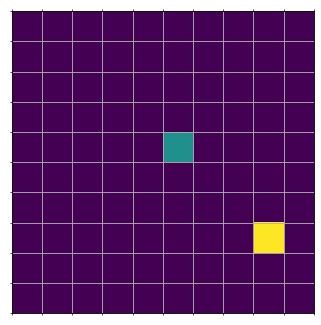

In [49]:
nrows = 10
ncols = 10
world = rw.new_world(nrows=nrows, ncols=ncols)
robo = world.get_robo()
robo.disable_print()
world.disable_animation()
world.show()

In [50]:
path = find_shortest_walk(robo)
print(f'Shortest walk: {path}')
inverse_walk(robo, path)
world.enable_animation()

walk(robo, path)
rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


Shortest walk: [2, 0, 0, 1, 0, 0]


Da unser Algorithmus viele *Tiefensuchen* durchführt ist er nicht sonderlich effektiv.
Die Ausführung kann einige Zeit in Anspruch nehmen.
Wir erkennen jedoch, dass der Algorithmus tatsächlich einen der kürzesten Wege findet.

#### Lauf im Labyrinth

Sie können sich noch eine weitaus komplexere Welt mit Hindernissen erzeugen lassen.
Ein echtes Labyrinth!
Dazu dient folgender Aufruf:

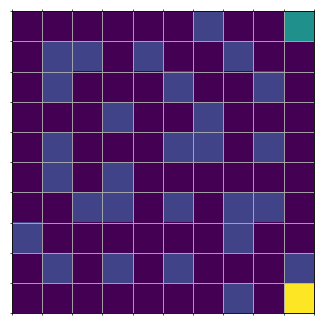

In [51]:
nrows = 10
ncols = 10
world = rw.complex_maze(nrows,ncols)
world.show()

Es wird Zeit die beiden Läufe, die wir einmal durch die *Tiefensuche* und einmal durch die *Breitensuche* berechnen, zu vergleichen.
Sie können gerne mit nachfolgendem Code herumspielen.

Zuerst erzeugen wir uns ein Labyrinth und kopieren dieses.
Außerdem deaktivieren wir die Ausgabe und die Möglichkeit zu animieren.

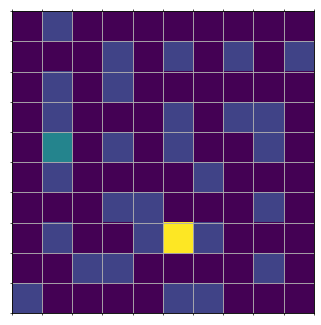

In [52]:
import roboworld as rw
import copy

world1 = rw.complex_maze(10, 10)
world2 = copy.deepcopy(world1)
robo1 = world1.get_robo()
robo2 = world2.get_robo()

robo1.disable_print()
robo2.disable_print()

world1.disable_animation()
world2.disable_animation()

world1.show()

Dann generieren wir einen Lauf durch die *Tiefensuche*, laufen den Lauf wieder zurück, aktivieren die Animation, laufen den Lauf erneut ab und animieren den Lauf.

In [53]:
path, level = depth_first_walk(robo1, distance=None)
inverse_walk(robo1, path)
world1.enable_animation()
walk(robo1, path)

rw.animate(world1)

MovieWriter imagemagick unavailable; using Pillow instead.


Der Roboter scheint recht verwirrt durch die Gegen zu laufen.
Das gleiche führen wir nun mit der *Breitensuche* durch.

In [54]:
path = find_shortest_walk(robo2)
inverse_walk(robo2, path)
world2.enable_animation()
walk(robo2, path)

rw.animate(world2)

MovieWriter imagemagick unavailable; using Pillow instead.


In diesem Fall läuft der Roboter zielstrebig auf kürzestem Weg zum Ziel.
Vergleichen Sie den Unterschied!

Es ist anzumerken, dass der Roboter den kürzesten Weg ersteinmal finden musste.
Wenn wir die gelaufene Gesamtstrecke vergleichen, ist er durch die *Tiefensuche* wahrscheinlich insgesamt weniger weit gelaufen.

```{exercise} Aufwand der Breitensuche
:label: robo-steps-breadth-first-search-exercise
Angenommen der kürzeste Weg zum Ziel besteht aus 5 Zellen.
Wie viele Schritte muss der Roboter maximal insgesamt laufen, wenn wir er durch die *Breitensuche* bewegt wird?
```

```{solution} robo-steps-breadth-first-search-exercise
:label: robo-steps-breadth-first-search-solution
:class: dropdown
Für eine *Tiefensuche* der Distanz $k$ benötigt der Roboter

$$
2 \cdot 4^k
$$

Schritte. Wir laufen jede Kante des Baums zweimal ab (Hinweg und Rückweg).
Das bedeutet der Roboter läuft insgesamt maximal

$$
2 \cdot (4^1 + 4^2 + 4^3 + 4^4 + 4^5) = 2728
$$

Schritte.

Zum Vergleich: Die unbeschränkte *Tiefensuche* braucht für ein Gebiet mit $n$ Zellen maximal $2n$ Schritte, denn wir besuchen keine Zelle doppelt müssen aber hin und wieder zurücklaufen.
Für ein Gebiet mit 36 Spalten und 36 Zeilen würde die *Tiefensuche* für den obigen Fall weniger Schritte benötigen ($36 < \sqrt{2728 / 2}$).
```